In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [97]:
t = 500.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [164]:
tr[end]

3-element SVector{3, Float64} with indices SOneTo(3):
 11.564551784594912
  0.3949329712719619
  0.39995923995136934

## Диапазон [-0.09635; -0.097]
## Начальные условия в единственном экземпляре 

In [182]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375

const xthr = 0.9; const ythr = 0.4 # ythr was change

α = 0.0900; U0 = 0.40; ΔU0 = 0.330; I0 =  -0.0965475  # -0.09639 # -0.096532

-0.0965475

In [183]:
[0.16580102063549454
 0.945448338899747
 0.35579634944818345]

3-element Vector{Float64}:
 0.16580102063549454
 0.945448338899747
 0.35579634944818345

Chaos

I_0 = -0.0965475

u0 = 0.0629179098954805,
 0.9878011165718715,
 0.39348502100476596

In [184]:
p = SA[α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = tr[end]

3-element SVector{3, Float64} with indices SOneTo(3):
 0.428537999085547
 0.9869461018719765
 0.4147074686519084

In [185]:
"""
I0 -0.09655 
SA[0.5016565343933567
 0.8843561571148351
 0.3465491964077342

I0 -0.09658
SA[0.17859698043562283
 0.96512249099938
 0.37012169901914443]]
"""

"I0 -0.09655 \nSA[0.5016565343933567\n 0.8843561571148351\n 0.3465491964077342\n\nI0 -0.09658\nSA[0.17859698043562283\n 0.96512249099938\n 0.37012169901914443]]\n"

Cycle

parameters

const τ =  0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375
const xthr = 0.9; const ythr = 0.4 # ythr was change
α = 0.850; U0 = 0.3; ΔU0 = 0.305; I0 = -1.0

u0 [0.6388778225673112, 0.9509649024501307, 0.4624513204009227]

In [186]:
ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [0.428538, 0.986946, 0.414707]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.09, 0.013, 0.15, 1.8, 3.07, 0.9, …, 0.33, 0.4375, -0.0965475]

In [187]:
tr = trajectory(ds, t, Δt = tstep; Ttr = tt, diffeq = integ_set);

In [188]:
tr

3-dimensional Dataset{Float64} with 500001 points
 1.00926    0.744061  0.362471
 1.00294    0.74543   0.362288
 0.996704   0.746792  0.362106
 0.990538   0.748147  0.361925
 0.984444   0.749494  0.361744
 0.978422   0.750834  0.361564
 0.972471   0.752167  0.361385
 0.966589   0.753492  0.361206
 0.960774   0.75481   0.361028
 0.955027   0.756122  0.36085
 0.949345   0.757426  0.360673
 0.943728   0.758722  0.360497
 0.938175   0.760012  0.360322
 ⋮                    
 0.0608559  0.987246  0.391784
 0.0610323  0.987299  0.391939
 0.0612108  0.987351  0.392094
 0.0613915  0.987403  0.392248
 0.0615743  0.987455  0.392403
 0.0617593  0.987505  0.392558
 0.0619465  0.987556  0.392712
 0.0621361  0.987606  0.392867
 0.0623279  0.987655  0.393021
 0.0625222  0.987704  0.393176
 0.0627188  0.987753  0.393331
 0.0629179  0.987801  0.393485

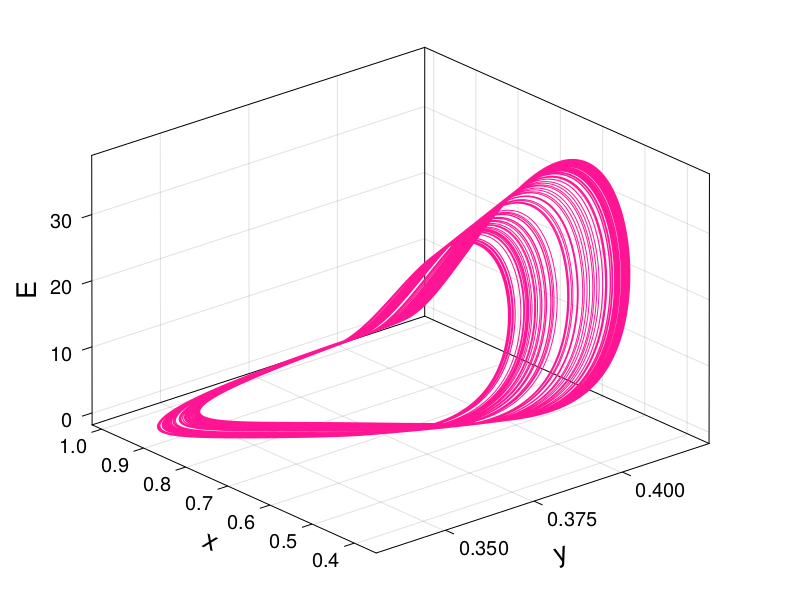

In [189]:
lb_size = 27
tck_size = 20

f = Figure()

axis3 = Axis3(f[1, 1], xlabel = "y", ylabel = "x", zlabel = "E",
                xlabelsize = lb_size, ylabelsize = lb_size, zlabelsize = lb_size,
                xticklabelsize = tck_size, yticklabelsize = tck_size, zticklabelsize = tck_size)

lines!(axis3, tr[:, 3], tr[:, 2], tr[:, 1], linewidth = 1.0, color = :deeppink)
f

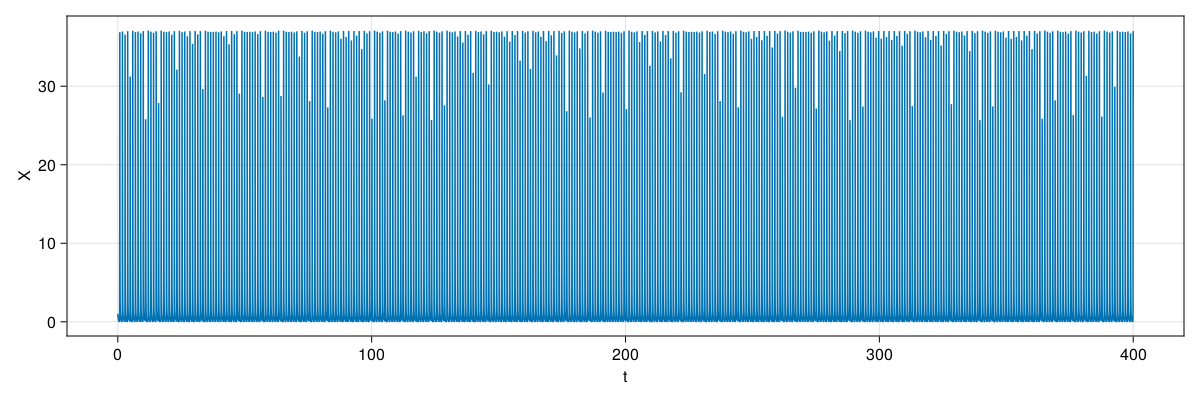

In [190]:
ts, tf = 1, 400000
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1], xlabel = "t", ylabel = "X")
lines!(axis, trange[ts:tf], tr[ts:tf, 1])
f

In [191]:
lyapunovspectrum(ds, 5000.0; Ttr = 1000.0, diffeq = integ_set)

3-element Vector{Float64}:
  0.3412031929824236
 -0.0004512764097523706
 -6.373714711984057